<a href="https://colab.research.google.com/github/Jiwon510/MachineLearning/blob/main/%EB%8B%A4%ED%95%AD_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 데이터 준비

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 2. 훈련 데이터, 테스트 데이터 분류

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
    )

In [ ]:
# 3. 데이터 전처리

from sklearn.preprocessing import PolynomialFeatures

# reshape : 1차원 배열을 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 훈련 데이터와 테스트 데이터 제곱
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
# 4. 훈련

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [ ]:
# 오차

from sklearn.metrics import mean_absolute_error

test_prediction = lr.predict(test_poly)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

37.76606283367664


In [ ]:
# 5. 예측

# 50cm 농어의 무게 
print(lr.predict([[50**2, 50]]))

# coef_ : 기울기, intercept_ : y절편
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


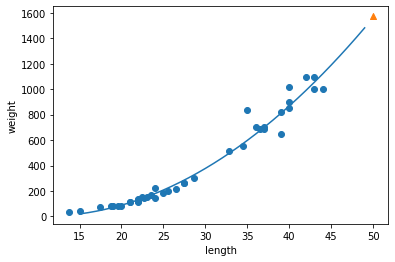

In [ ]:
# 6. 산점도 표시

import matplotlib.pyplot as plt

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 50)

# 훈련 데이터 산점도 표시
plt.scatter(train_input, train_target)

# 예측 데이터 산점도 표시
plt.scatter([50], [1574], marker='^')

# 15에서 40까지 2차 방정식 그래프를 작성
# 무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()